### 당뇨병 환자 데이터셋(Diabetes)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# load_데이터셋이름
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [4]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

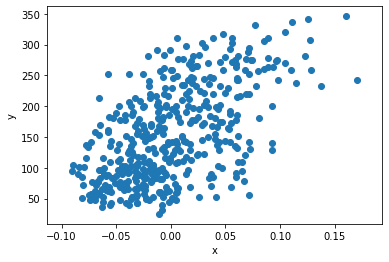

In [6]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# 훈련데이터 생성
x = diabetes.data[:,2]
y = diabetes.target

### 예측값으로 올바른 모델을 찾아내는 작업

In [8]:
# step1. 임의의 w, b를 만든다
w = 1.0
b = 1.0

In [9]:
# step2. 훈련데이터의 첫번째 샘플을 이용해서 예측값(y_hat)
y_hat = x[0] * w + b
y_hat

1.0616962065186886

In [10]:
# step3. 타깃과 예측값을 비교한다
y[0]

151.0

In [11]:
# w값을 조절해서 예측값을 바꾸는 작업
# w값을 0.1만큼 증가
w_inc = w + 0.1                # inc = increase  # 변화율 0.1을 음수로 줘도 증가한다,,?
y_hat_inc = x[0] * w_inc + b
y_hat_inc                      # 증가전보다 결과값에 가까워졌으니 잘한 일이다
                               # 차이가 커졌다면 -0.1 을 해주자

1.0678658271705574

In [12]:
# w값을 조정한 후 예측값이 증가한 정도를 확인 (변화율)  # 첫번째 학습데이터의 변화율
w_rate = (y_hat_inc - y_hat) / (w_inc - w)                                # 학습비율
w_rate

0.061696206518688734

In [13]:
x[0]

0.0616962065186885

In [32]:
x[1]

-0.0514740612388061

In [14]:
# 변화율을 업데이트 할 때(가중치 w를 업데이트 하는 방법)
w_new = w + w_rate
w_new

1.0616962065186888

### 변화율로 절편 업데이트 하기

In [15]:
y_hat_inc = x[0] * w + b
y_hat_inc

1.0616962065186886

In [16]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
y_hat_inc

1.1616962065186887

In [17]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate

1.0

In [18]:
b_new = b+1       # 1 = b_rate  # 항상 1이므로 굳이 b_rate로 안쓰고 1로 써도됨
b_new

2.0

### 오차 역전파로 가중치와 절편 업데이트하는 작업

In [19]:
# 오차(y - y_hat)와 변화율을 곱해서 가중치(w)를 업데이트 하기
err = y[0] - y_hat            # err = error 오차
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [20]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat 

w_rate = x[1]
w_new = w_new + w_rate * err

# b_rate = 1
# b_new = b_new + b_rate * err
b_new = b_new + 1 * err

print(w_new, b_new)

14.132317616381767 75.52764127612664


In [21]:
# zip() : 여러 개의 배열에서 동시에 요소를 하나씩 반환해주는 함수
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
    
print(w, b)

587.8654539985689 99.40935564531424


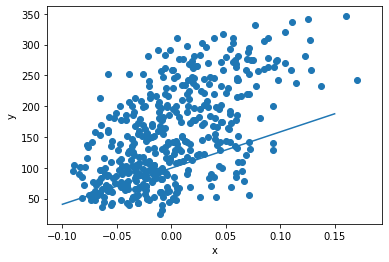

In [22]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
round(913.5973364345905, 5)

913.59734

In [24]:
# 에포크(epoch) : 입력 값에 대해 몇번이나 반복하여 실험했는지를 나타냄
for _ in range(1, 100):       # 처음부터(x[0]) 다시 모든과정 반복,, 3번 정도만 해도 최종결과와 거의 유사한 값이 나타남
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)    

913.5973364345905 123.39414383177204


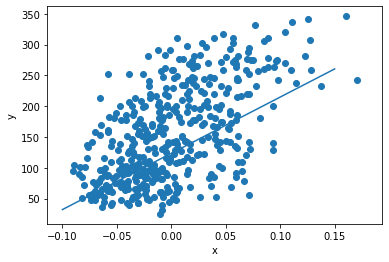

In [25]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### y_hat = 913.6x + 123.4        #### 썩 나쁘진 않다..

In [26]:
# 모델을 이용한 예측
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643899983

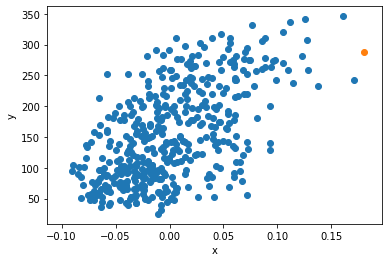

In [27]:
plt.scatter(x, y)
# pt1 = (-0.1, -0.1*w+b)
# pt2 = (0.15, 0.15*w+b)
# plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 선형회귀의 뉴런 클래스

In [28]:
class Neuron : 
    def __init__(self):
        self.w = 1.0   # 가중치 초기화
        self.b = 1.0   # 절편 초기화
          
    def forpass(self, x):  # 1차 방정식을 계산하는 메서드
        y_hat = x * self.w + self.b
        return y_hat
    
    def backprob(self, x, err):
        w_gred = x * err   # 가중치에 대한 경사하강법  # gred 경사값(기울기)... gradient
        b_gred = 1 * err   # 절편에 대한 경사하강법
        return w_gred, b_gred
    
    def fit(self, x, y, epochs=100):
        for _ in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)  # 정방향 계산
                err = -(y_i - y_hat)       # 오차 계산
                w_gred, b_gred = self.backprob(x_i, err)  # 역방향 계산
                self.w -= w_gred  # 가중치 업데이트
                self.b -= b_gred  # 절편 업데이트

In [29]:
neuron = Neuron()
neuron.fit(x, y)

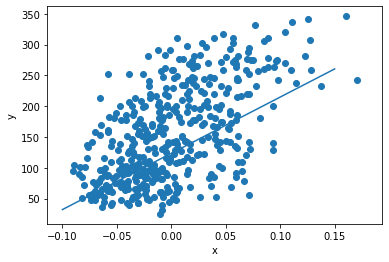

In [30]:
plt.scatter(x, y)
plt1 = (-0.1, -0.1 * neuron.w + neuron.b)
plt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([plt1[0],plt2[0]], [plt1[1],plt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()